# Machine Learning Regression Model

In [1]:
import pandas as pd

df = pd.read_excel('data/new_btc.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,DOWN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,DOWN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,UP
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,DOWN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,UP
...,...,...,...,...,...,...,...,...
2024-07-16,64784.417969,65354.339844,62487.968750,65097.148438,65097.148438,41617346768,1.525848,DOWN
2024-07-17,65091.832031,66066.734375,63896.085938,64118.792969,64118.792969,32525071311,0.226227,DOWN
2024-07-18,64104.738281,65104.660156,63246.164062,63974.066406,63974.066406,27239305337,-4.101459,UP


## Separate the data
- Target: which variable do you want to predict?
- Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

## The following model will predict the numerical increase of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

In [3]:
print(target.isna().sum())


815


In [4]:
# Combine explanatory and target DataFrames
df_combined = pd.concat([explanatory, target], axis=1)

# Drop rows where target is NaN
df_combined = df_combined.dropna(subset=['change_tomorrow'])

# Split the DataFrame back into explanatory and target
explanatory = df_combined[['Open', 'High', 'Low', 'Close', 'Volume']]
target = df_combined['change_tomorrow']


In [5]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(explanatory, target)


DecisionTreeRegressor(max_depth=15)

In [6]:
print(explanatory.isna().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Load and prepare the data
df = pd.read_excel('data/new_btc.xlsx', parse_dates=['Date'], index_col=0)

# Extract target and explanatory variables
target = df['change_tomorrow']
explanatory = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Drop rows where target is NaN
df_cleaned = df.dropna(subset=['change_tomorrow'])
explanatory_cleaned = df_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']]
target_cleaned = df_cleaned['change_tomorrow']

# Fit the model
model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(explanatory_cleaned, target_cleaned)

# Make predictions
y_pred = model_dt.predict(explanatory_cleaned)

# Create a DataFrame for predictions
df_predictions = df.loc[df_cleaned.index].copy()
df_predictions['prediction'] = y_pred

# Check the result
print(df_predictions.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-12-08  768.075989  774.697998  765.945984  770.809998  770.809998   
2016-12-09  769.943970  774.528015  769.648987  772.794006  772.794006   
2016-12-10  773.023010  777.091980  772.909973  774.650024  774.650024   
2016-12-11  774.752014  774.797974  765.411987  769.731018  769.731018   
2016-12-12  770.039978  781.921997  770.039978  780.086975  780.086975   

              Volume  change_tomorrow change_tomorrow_direction  prediction  
Date                                                                         
2016-12-08  80111904        -0.256732                        UP   -0.256732  
2016-12-09  68705296        -0.239594                        UP   -0.239594  
2016-12-10  53843100         0.639055                      DOWN    0.639055  
2016-12-11  57313400        -1.327539                        UP   -1.327539  
2016-12-12  7

In [8]:
# Initialize prediction column with NaN values
df['prediction'] = np.nan

# Assign predictions to the corresponding rows
df.loc[df_cleaned.index, 'prediction'] = y_pred

# Check the result
print(df[['change_tomorrow', 'prediction']].head())


            change_tomorrow  prediction
Date                                   
2014-09-17              NaN         NaN
2014-09-18              NaN         NaN
2014-09-19              NaN         NaN
2014-09-20              NaN         NaN
2014-09-21              NaN         NaN


In [9]:
error = df_predictions.change_tomorrow - df_predictions.prediction
error.sum().round(2)

0.0

In [10]:
error_squared = error**2
error_squared.sum()

28460.181585163977

In [11]:
error_squared.mean()


10.237475390346754

In [12]:
error_squared_mean = error_squared.mean()
error_squared_mean

10.237475390346754

In [13]:
import numpy as np

rmse = np.sqrt(error_squared_mean)
rmse

3.1996055054251227

In [14]:
error.std()


3.200181129340079

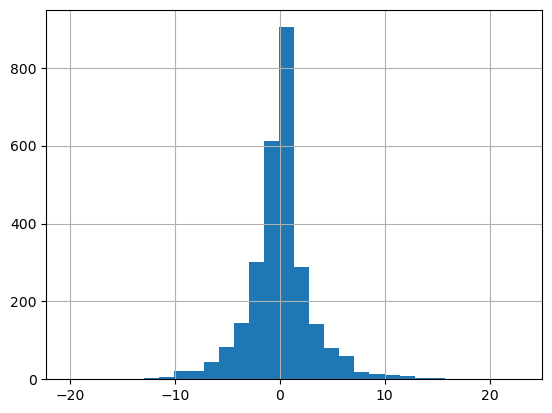

In [15]:
error.hist(bins=30);


In [16]:
import pickle


In [17]:
with open('models/model_dt_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

In [18]:
from backtesting import Backtest, Strategy


/Users/hudazain/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [19]:
class Regression(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < -5 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [20]:
df_explanatory = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()


In [21]:
df_explanatory.iloc[-1:, :]


,Open,High,Low,Close,Volume
Date,,,,,
2024-07-20,66707.671875,66854.445312,66307.953125,66452.679688,31415080960


In [22]:
bt = Backtest(df_explanatory, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

/var/folders/fq/ylhr8mt918z_w0k7l80824rh0000gn/T/ipykernel_12816/1143378273.py:1: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(df_explanatory, Regression,


In [23]:
results = bt.run()


In [24]:
results.to_frame(name='Values').loc[:'Return [%]']


,Values
Start,2014-09-17 00:00:00
End,2024-07-20 00:00:00
Duration,3594 days 00:00:00
Exposure Time [%],4.478442
Equity Final [$],1539.329675
Equity Peak [$],11198.156132
Return [%],-84.606703


In [25]:
import os

# Create the directory if it doesn't exist
os.makedirs('reports_backtesting', exist_ok=True)
 

In [26]:
bt.plot(filename='reports_backtesting/backtesting_regression.html')


/Users/hudazain/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/hudazain/anaconda3/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p1289', ...)

In [27]:
df_explanatory = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()


In [28]:
bt = Backtest(df_explanatory, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

/var/folders/fq/ylhr8mt918z_w0k7l80824rh0000gn/T/ipykernel_12816/1143378273.py:1: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(df_explanatory, Regression,


In [29]:
model_dt.predict(df_explanatory)


array([-1.32753877, -1.32753877, -1.32753877, ..., -0.05018125,
       -0.05018125, -0.05018125])

In [30]:
results = bt.run()


In [31]:
results.to_frame(name='Values').loc[:'Return [%]']


,Values
Start,2014-09-17 00:00:00
End,2024-07-20 00:00:00
Duration,3594 days 00:00:00
Exposure Time [%],4.478442
Equity Final [$],1539.329675
Equity Peak [$],11198.156132
Return [%],-84.606703


In [32]:
class Regression(Strategy):
    
    limit_buy = 1
    limit_sell = -5
    
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [33]:
bt = Backtest(df_explanatory, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

/var/folders/fq/ylhr8mt918z_w0k7l80824rh0000gn/T/ipykernel_12816/1143378273.py:1: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(df_explanatory, Regression,


In [34]:
list_limits_buy = list(range(0, 11, 1))


In [35]:
list_limits_buy


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [36]:
list_limits_sell = list(range(0, -11, -1))


In [37]:
import multiprocessing as mp
mp.set_start_method('fork')

In [39]:
pip install scikit-optimize

  Obtaining dependency information for scikit-optimize from https://files.pythonhosted.org/packages/65/cd/15c9ebea645cc9860aa71fe0474f4be981f10ed8e19e1fb0ef1027d4966e/scikit_optimize-0.10.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyaml>=16.9 from https://files.pythonhosted.org/packages/17/78/bafa787bd01ee6b4fc373793bda018f784e3ad457f5da6d787dbdcb902b8/pyaml-24.7.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.5 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
stats_skopt, heatmap, optimize_result = bt.optimize(
    limit_buy=[0, 10],
    limit_sell=[-10, 0],
    maximize='Return [%]',
    method='skopt',
    max_tries=500,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)

Backtest.optimize:   0%|          | 0/500 [00:00<?, ?it/s]

In [41]:
dff = heatmap.reset_index()
dff = dff.pivot(index='limit_buy', columns='limit_sell', values='Return [%]')
dff

limit_sell,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
limit_buy,,,,,,,,,,,
0,NaN,717.113018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,-71.432117,NaN,-84.606703,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,-89.006957,NaN,-96.769623,NaN,-98.083689,NaN,NaN
3,NaN,NaN,-71.881312,NaN,NaN,NaN,NaN,-98.456023,NaN,-95.471623,NaN
4,-67.688877,NaN,NaN,NaN,NaN,NaN,NaN,-99.228275,-92.562104,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,-87.674273,NaN,NaN,NaN,-95.282771,-96.313106
6,NaN,-73.129063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,-100.000000,NaN,-100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-100.000000
8,NaN,NaN,NaN,NaN,-100.000000,-100.000000,NaN,-100.000000,NaN,NaN,NaN


In [42]:
dff.style.highlight_null(props='background-color: transparent; color: transparent')


limit_sell,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
limit_buy,,,,,,,,,,,
0,nan,717.113018,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,-71.432117,nan,-84.606703,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,-89.006957,nan,-96.769623,nan,-98.083689,nan,nan
3,nan,nan,-71.881312,nan,nan,nan,nan,-98.456023,nan,-95.471623,nan
4,-67.688877,nan,nan,nan,nan,nan,nan,-99.228275,-92.562104,nan,nan
5,nan,nan,nan,nan,nan,-87.674273,nan,nan,nan,-95.282771,-96.313106
6,nan,-73.129063,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,-100.000000,nan,-100.000000,nan,nan,nan,nan,nan,nan,-100.000000
8,nan,nan,nan,nan,-100.000000,-100.000000,nan,-100.000000,nan,nan,nan


In [43]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient(vmin=np.nanmin(dff), vmax=np.nanmax(dff))\
    .highlight_null(props='background-color: transparent; color: transparent')

limit_sell,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10
limit_buy,,,,,,,,,,,
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,717,nan
1,nan,nan,nan,nan,nan,-85,nan,-71,nan,nan,nan
2,nan,nan,-98,nan,-97,nan,-89,nan,nan,nan,nan
3,nan,-95,nan,-98,nan,nan,nan,nan,-72,nan,nan
4,nan,nan,-93,-99,nan,nan,nan,nan,nan,nan,-68
5,-96,-95,nan,nan,nan,-88,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,-73,nan
7,-100,nan,nan,nan,nan,nan,nan,-100,nan,-100,nan
8,nan,nan,nan,-100,nan,-100,-100,nan,nan,nan,nan


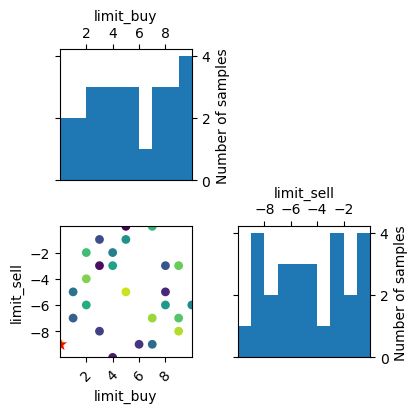

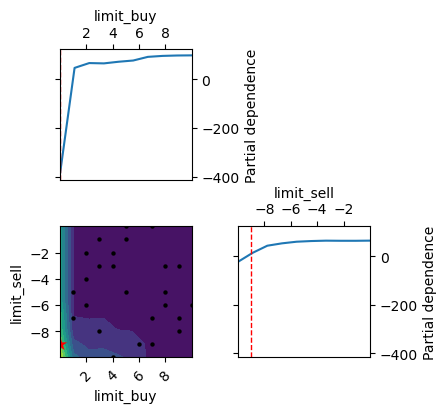

In [44]:
from skopt.plots import plot_evaluations
from skopt.plots import plot_objective

_ = plot_evaluations(optimize_result, bins=10)
_ = plot_objective(optimize_result, n_points=10)